In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd

feature_names =  ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'magX', 'magY', 'magZ']

cat_dict = {'1a': 0,'1b': 1,'2a': 2, '2b': 3, '2c': 4, '2d': 5, '3a': 6, '3b': 7, 'TRANSITION': -1}

def process_file(filename):
    col_names = ['timestamp'] + feature_names + ['cat']
    df = pd.read_csv(filename, header=None, names=col_names)
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#     df = df.dropna()
    df['cat'] = df['cat'].map(cat_dict) 
#     df['upright'] = (df['cat'] ==  1) | (df['cat'] == 0) |  (df['cat'] == 7) | (df['cat'] == 6)
#     df['smartphone'] = (df['cat'] == 1) | (df['cat'] == 3) | (df['cat'] == 5) | (df['cat'] == 7)
#     df.upright = df.upright.astype(int)
#     df.smartphone = df.smartphone.astype(int)   
    return df

df1_unfiltered = process_file('1_50Hz.csv')
df2_unfiltered = process_file('2_50Hz.csv')
df3_unfiltered = process_file('3_50Hz.csv')
df4_unfiltered = process_file('4_50Hz.csv')

df1234 = pd.concat([df1_unfiltered,df2_unfiltered,df3_unfiltered,df4_unfiltered])

def normalize(df):
    for feature in feature_names:
        df[feature] = (df[feature] - df1234[feature].mean()) / (df1234[feature].max() - df1234[feature].min())
        
# normalize(df1_unfiltered)
# normalize(df2_unfiltered)
# normalize(df3_unfiltered)
normalize(df4_unfiltered)

df1 = df1_unfiltered[df1_unfiltered['cat'] != -1]
df2 = df2_unfiltered[df2_unfiltered['cat'] != -1]
df3 = df3_unfiltered[df3_unfiltered['cat'] != -1]
df4 = df4_unfiltered[df4_unfiltered['cat'] != -1]

# df12 = pd.concat([df1, df2])
# df123 = pd.concat([df1, df2, df3])

print(df1_unfiltered.shape, df2_unfiltered.shape, df3_unfiltered.shape, df4_unfiltered.shape)
print(df1.shape, df2.shape, df3.shape, df4.shape)

(773711, 11) (846331, 11) (888477, 11) (536575, 11)
(673516, 11) (747021, 11) (678459, 11) (437013, 11)


In [44]:
df4_unfiltered

,timestamp,accX,accY,accZ,gyroX,gyroY,gyroZ,magX,magY,magZ,cat
0,2019-07-10_141406:660,0.041743,-0.007580,-0.085844,-0.021308,-0.001357,0.003932,0.219537,0.030052,-0.318880,-1.0
1,2019-07-10_141406:680,0.040979,-0.008618,-0.084566,-0.022082,0.001864,0.001581,0.219537,0.030052,-0.318880,-1.0
2,2019-07-10_141406:700,0.044032,-0.007933,-0.082628,-0.022540,0.004483,-0.001307,0.219537,0.030052,-0.318880,-1.0
3,2019-07-10_141406:720,0.041743,-0.005505,-0.083597,-0.022821,0.005529,-0.006411,0.215860,0.037734,-0.300972,-1.0
4,2019-07-10_141406:740,0.039453,-0.005505,-0.084566,-0.022681,0.005288,-0.010643,0.215860,0.037734,-0.300972,-1.0
5,2019-07-10_141406:760,0.034874,-0.005173,-0.085844,-0.021765,0.005690,-0.014405,0.212084,0.016657,-0.311627,-1.0
6,2019-07-10_141406:780,0.027762,-0.005505,-0.086174,-0.020851,0.006495,-0.018503,0.212084,0.016657,-0.311627,-1.0
7,2019-07-10_141406:800,0.023686,-0.005858,-0.087143,-0.017543,0.007382,-0.024481,0.212084,0.016657,-0.311627,-1.0
8,2019-07-10_141406:820,0.022924,-0.004467,-0.089080,-0.014094,0.009033,-0.029182,0.215860,0.009631,-0.311627,-1.0
9,2019-07-10_141406:840,0.029029,-0.001354,-0.092297,-0.009661,0.011208,-0.032810,0.215860,0.009631,-0.311627,-1.0


In [9]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import warnings
warnings.filterwarnings('ignore')

1.14.0


In [3]:
from collections import Counter
from keras.utils import to_categorical

def window_stack(a):
    n = a.shape[0]
    result = np.zeros((128 + 64 * (n//64), 9))
    result[:a.shape[0], :a.shape[1]] = a
#     print(result.shape)
#     print(result[1*64 : 128+1*64].shape)
    result =  np.dstack( result[i*64 : 128+i*64] for i in range(n // 64) )
    result = np.transpose(result, (2, 0, 1))
    return result

def construct_y(a):
    n = a.shape[0]
    result = np.zeros((n//64))
#     print(result.shape)
    for i in range(n //64):
        subarr = a.values[i*64 : 128+i*64]
        result[i] = Counter(subarr).most_common(1)[0][0]
    return result

def prepare_for_training(training_set, testing_set, category):
    
    #training data
    trainX, trainy = training_set[feature_names], training_set[category]
    # load all test
    testX, testy = testing_set[feature_names], testing_set[category]

    testy = construct_y(testy)
    trainy = construct_y(trainy)
    
    trainX = window_stack(trainX.values)
    testX = window_stack(testX.values)
        
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

Using TensorFlow backend.


In [4]:
from tensorflow.python.keras import *
from tensorflow.python.keras.layers import *

from numpy import mean
from numpy import std

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, models):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    models.append(model)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy
 
# summarize scores
def summarize_results(scores):
    print(scores)
    # summarize mean and standard deviation
    m, s = mean(scores), std(scores)
    print('%.3f%% (+/-%.3f)' % (m, s))

# m, s = mean(scores), std(scores)
# print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [5]:
def train_models_for_datasets(trainX, trainy, testX, testy):
    models = []
    # repeat experiment
    scores = list()
    for r in range(10):
        score = evaluate_model(trainX, trainy, testX, testy, models)
        score = score * 100.0
        print('#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)
    return models, scores

In [6]:
from matplotlib import pyplot

# plot a histogram of each variable in the dataset
def plot_variable_distributions(trainX):
	# remove overlap
	cut = int(trainX.shape[1] / 2)
	longX = trainX[:, -cut:, :]
	# flatten windows
	longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
	print(longX.shape)
	pyplot.figure()
	xaxis = None
	for i in range(longX.shape[1]):
		ax = pyplot.subplot(longX.shape[1], 1, i+1, sharex=xaxis)
		ax.set_xlim(-1, 1)
		if i == 0:
			xaxis = ax
		pyplot.hist(longX[:, i], bins=100)
	pyplot.show()

In [7]:
def dataset_to_activities(df):
    activities = []
    current_activ = 0
    counter = 0
    for _, row in df.iterrows():
        if row['cat'] == current_activ:
            counter += 1
        else:
            activities.append((current_activ, counter))
            current_activ = row['cat']
            counter = 0
    return activities

divided = dataset_to_activities(df3_unfiltered)
print(divided)

[(0, 0), (-1, 4799), (1, 16415), (-1, 1520), (6, 7871), (-1, 3165), (5, 43571), (-1, 3500), (2, 16117), (-1, 2978), (3, 15018), (-1, 2168), (6, 15270), (-1, 1940), (0, 5022), (-1, 2058), (6, 35522), (-1, 34690), (0, 1678), (-1, 2708), (3, 1716), (-1, 2547), (7, 4570), (-1, 2688), (0, 1121), (-1, 1223), (6, 1124), (-1, 1325), (0, 1763), (-1, 1564), (7, 3172), (-1, 5111), (4, 12067), (-1, 2358), (2, 3070), (-1, 3192), (0, 20668), (-1, 1178), (0, 1915), (-1, 5618), (4, 21016), (-1, 2339), (3, 1917), (-1, 1159), (2, 2172), (-1, 1748), (7, 2012), (-1, 1476), (6, 2409), (-1, 1838), (0, 4469), (-1, 1028), (1, 18012), (-1, 2091), (7, 4179), (-1, 2162), (6, 5169), (-1, 1246), (7, 1043), (-1, 1201), (7, 406), (-1, 18805), (0, 9618), (-1, 2358), (5, 7117), (-1, 3210), (7, 10422), (-1, 1518), (0, 3645), (-1, 2123), (5, 6311), (-1, 5761), (4, 32620), (-1, 2379), (1, 15016), (-1, 8283), (1, 23666), (-1, 3526), (7, 6273), (-1, 6375), (5, 4464), (-1, 1195), (5, 1010), (-1, 4047), (4, 17959), (-1, 2949

In [8]:
results = {}

for category in ['cat', 
#                  'upright', 'smartphone'
                ]:
    print(category)
    trainX, trainy, testX, testy = prepare_for_training(df123, df3, category)
    models, scores = train_models_for_datasets(trainX, trainy, testX, testy)
    results[category] = (models, scores)

cat


W0902 00:37:28.095999 10204 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(32796, 128, 9) (32796, 8) (10600, 128, 9) (10600, 8)
#1: 97.906
#2: 98.000
#3: 97.887
#4: 97.698
#5: 98.009
#6: 98.255
#7: 98.075
#8: 97.830
#9: 98.028
#10: 98.170
[97.90565967559814, 98.00000190734863, 97.88679480552673, 97.69811034202576, 98.0094313621521, 98.25471639633179, 98.07547330856323, 97.83018827438354, 98.02830219268799, 98.16980957984924]
97.986% (+/-0.155)


In [16]:
print(results)

def get_predictions(cat, i=0):
    return [np.argmax(x) for x in results[cat][0][i].predict(testX, batch_size=32)]

# smartphone = get_predictions('smartphone')
# upright = get_predictions('upright')
categories = get_predictions('cat')

{'cat': ([<tensorflow.python.keras.engine.sequential.Sequential object at 0x000002519BF79F98>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002519C313FD0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000251ACB189B0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000251B0003A90>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000251B091C4E0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000251B10EEEF0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000251B82ADAC8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000252190F0710>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000025223AB6940>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000025226F80940>], [97.90565967559814, 98.00000190734863, 97.88679480552673, 97.69811034202576, 98.0094313621521, 98.25471639633179, 98.07547330856323, 97.830

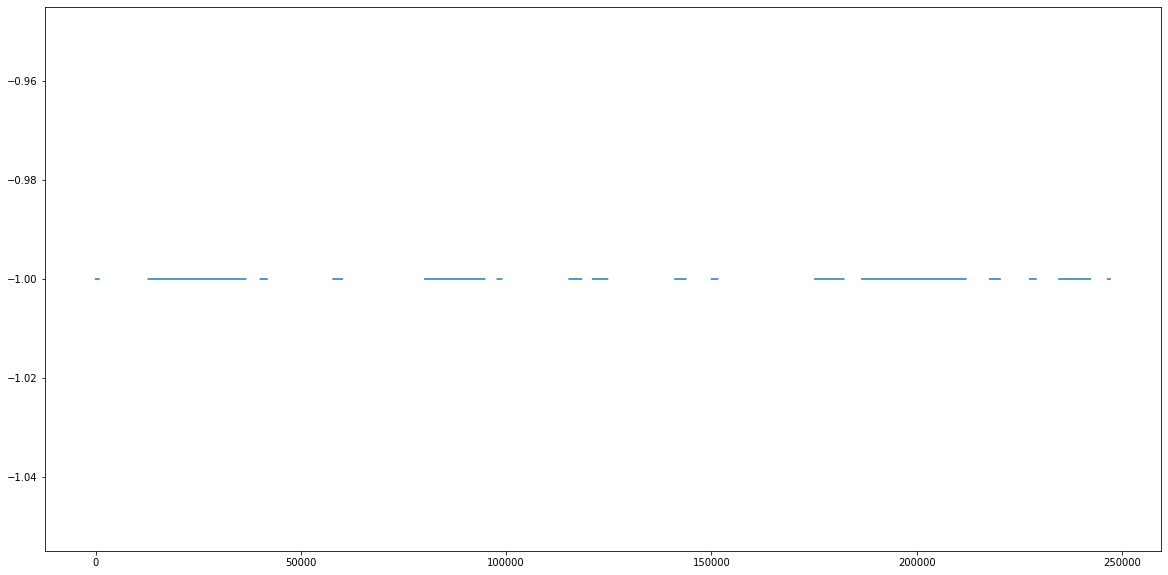

In [100]:
plt.figure(figsize=(20, 10))
plt.plot([x for x in range(247099)], df4_unfiltered.cat)

In [102]:
import operator


def restore(predictions, original, neutral_element=0):
    restored = []
    
    print(len(predictions))
    print(len(original))

    zeros_count = 0
    for j in range(10):
        zeros_count = 0
        restored.append([])
        for i in range(0, len(original)):
            if original[i] == neutral_element:
                restored[j].append(neutral_element)
                zeros_count += 1
            else:
                try:

                    restored[j].append((predictions[j][max(0, (i - zeros_count)//64 - 1)], 
                                   predictions[j][min(len(predictions[j])-1, (i - zeros_count)//64)]))
                except:
                    print(min(len(predictions[j])-1, (i - zeros_count)//64))
                    print(max(0, (i - zeros_count)//64 - 1))
                    print(zeros_count)
                    print(i)
                    
    print(len(restored))
    print(len(restored[0]))
          
    histograms = []  
    histogram = {}
    current_category = -2
    
    result_restored = []

    for i in range(0,  len(original)): 
        if restored[0][i] == neutral_element:
            current_category = -2
            result_restored.append(-1)
        else:
            if current_category == -2:
                j = i
                histogram = {}
                while restored[0][j] != neutral_element:
                        for k in range(10):
                            if restored[k][j][0] in histogram:
                              histogram[restored[k][j][0]] += 1
                            else:
                              histogram[restored[k][j][0]] = 1
                            if restored[k][j][1] in histogram:
                              histogram[restored[k][j][1]] += 1
                            else:
                             histogram[restored[k][j][1]] = 1
                        j += 1
                current_category = max(histogram.items(), key=operator.itemgetter(1))[0]
                histograms.append(histogram)
            result_restored.append(current_category)

    print("SUMMARY")
    print(len(result_restored))
    print(len(original))
    return result_restored, histograms

In [ ]:
def compare_results(original, to_restore, neutral_element=0):
    restored, histograms = restore(to_restore, original.values, neutral_element)
    error = np.mean( restored != original.values )
    print(error)
    print(histograms)
    plt.figure(figsize=(20, 5))
    plt.plot([x for x in range(len(restored))], restored, c='r')
    plt.plot([x for x in range(len(original))], original, c='b')
    
# compare_results(df3_unfiltered['smartphone'], smartphone)
# compare_results(df3_unfiltered['upright'], upright)
compare_results(df3_unfiltered['cat'], categories, -1)

In [104]:
testX = df4[feature_names]
testX = window_stack(testX.values)

predictions = []

for i in range(10):
    predictions.append(get_predictions('cat', i))
    
restored, histograms = restore(predictions, df4_unfiltered['cat'].values, neutral_element=-1)

10
247099
10
247099
SUMMARY
247099
247099


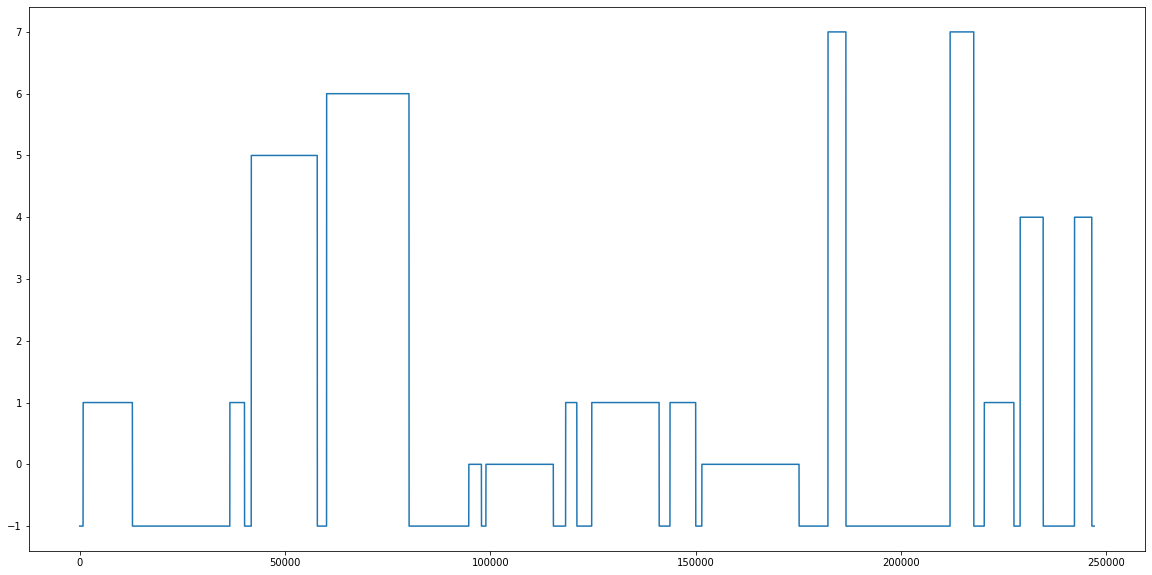

In [105]:
plt.figure(figsize=(20, 10))
plt.plot([x for x in range(len(restored))], restored)

In [106]:
histograms

[{1: 211116, 0: 17988, 4: 8192, 7: 2176, 6: 640, 2: 128},
 {1: 70939, 0: 188, 7: 303, 6: 35, 5: 35},
 {1: 71097, 7: 98359, 6: 18088, 5: 132738, 0: 1024, 3: 243, 2: 51},
 {5: 91, 6: 360191, 2: 22989, 3: 6669, 7: 26, 0: 11594},
 {6: 310, 0: 30790, 1: 30500},
 {1: 1379, 0: 136360, 4: 111085, 6: 76416, 3: 3200},
 {4: 147, 1: 52885, 0: 1224, 7: 384},
 {1: 325422, 7: 890, 0: 2048},
 {1: 119992, 7: 1030, 0: 4212, 6: 66},
 {0: 213180, 6: 169196, 1: 1004, 4: 87510, 3: 2688, 7: 22},
 {6: 11654, 4: 298, 0: 464, 1: 18284, 7: 46821, 3: 5101, 5: 4878},
 {6: 972, 5: 19306, 7: 54621, 3: 147, 1: 40374},
 {7: 882, 1: 139325, 5: 8, 0: 3712, 4: 333},
 {7: 54, 4: 111919, 1: 307},
 {4: 79832, 3: 3200, 6: 1152, 0: 256}]

In [115]:
new = df4_unfiltered[['timestamp', 'cat']].copy()
new['cat'] = restored
new = new[new['cat'] != -1]
new['cat'] = new['cat'].map({v: k for k, v in cat_dict.items()}) 
new.to_csv('results.csv', header=['timestamp', 'activity'], index=False)

In [ ]:
for i in range(10):
    models[i].save('models\model.h%d' % i)

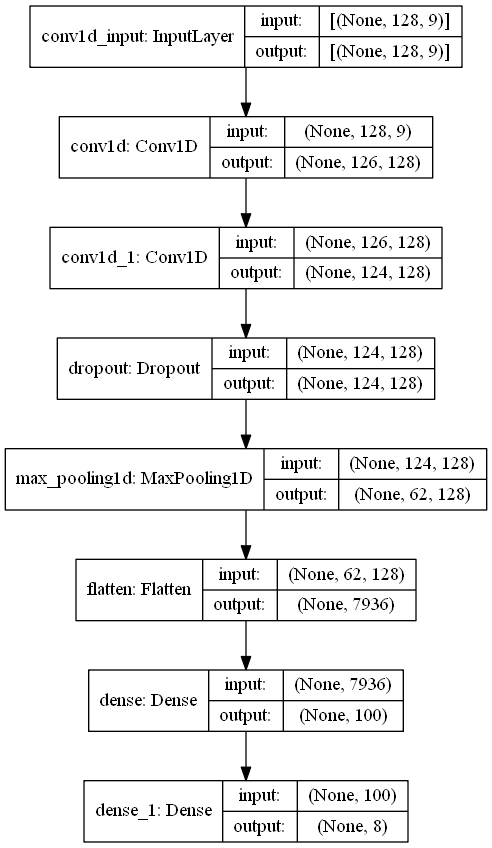

In [2]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

model = load_model('models\model.h0')

plot_model(model, show_shapes=True, show_layer_names=True)